In [124]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.utils import to_categorical

#Keras
##Marhia José Granada Restrepo
###10944890344

# Laboratorio

###1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

(1000, 2)


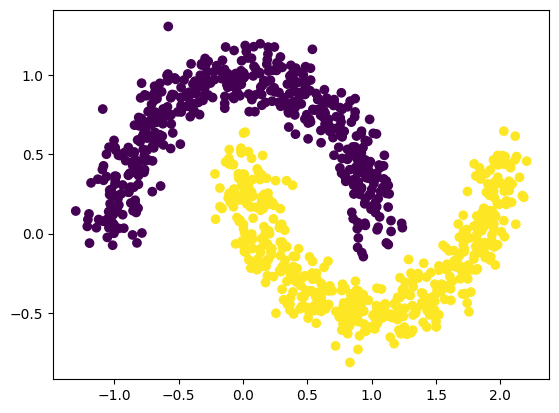

In [125]:
moon_X, moon_y = make_moons(n_samples=1000, noise=0.1, random_state=1)
print(moon_X.shape)
scatter = plt.scatter(moon_X[:,0], moon_X[:,1], c=moon_y)

In [126]:
moon_train_X, moon_test_X, moon_train_y, moon_test_y  = train_test_split(moon_X, moon_y, test_size = 0.2, random_state = 42)

print(len(moon_train_X))
print(len(moon_test_X))

800
200


In [127]:
standard_scaler = StandardScaler()
moon_X = standard_scaler.fit_transform(moon_X)

# Creación del modelo
def build_model_moons(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [128]:
model = build_model_moons()
history = model.fit(moon_train_X, moon_train_y, epochs=250, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
model.evaluate(moon_test_X, moon_test_y)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9757 - loss: 0.0984  


[0.09496788680553436, 0.9750000238418579]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/tmp/ipython-input-4151268925.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


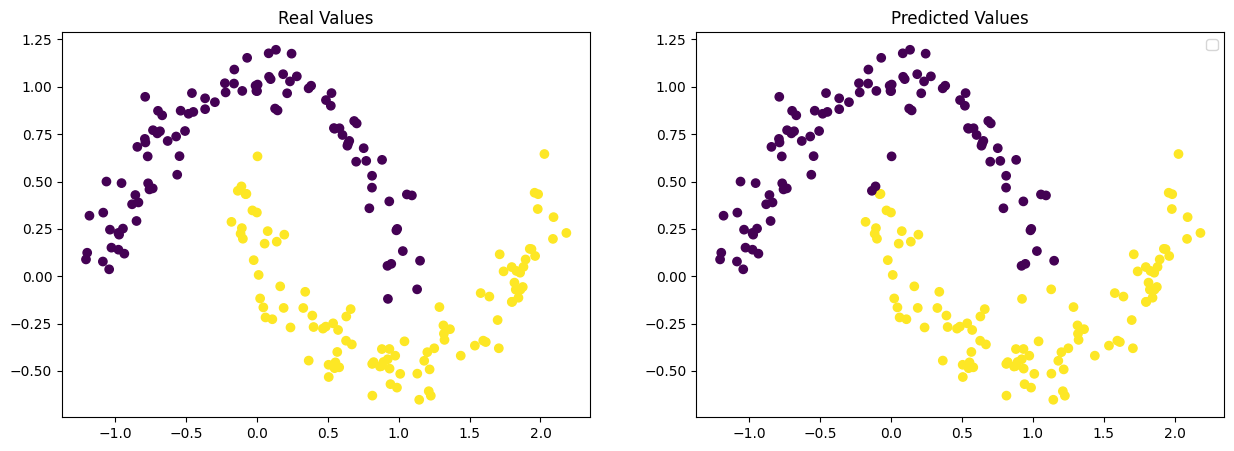

In [131]:
probs = model.predict(moon_test_X)
probs = np.round(probs).flatten()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].scatter(moon_test_X[:,0],moon_test_X[:,1], c=moon_test_y)
axes[1].scatter(moon_test_X[:,0],moon_test_X[:,1], c=probs)
axes[1].set_title("Predicted Values")
axes[0].set_title("Real Values")
plt.legend()

###2.Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [141]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

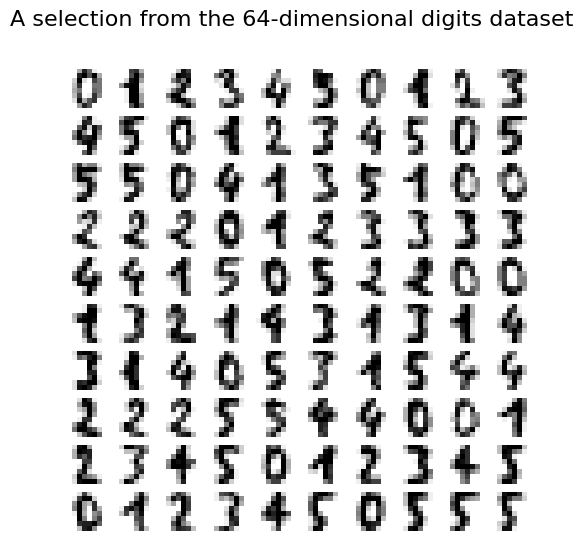

In [142]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def build_model_digits(activation = 'softmax', loss='categorical_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=64, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(6, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [144]:
model = build_model_digits()
history = model.fit(X_train, y_train, epochs=500, verbose=0)

In [145]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9302 - loss: 0.2277  


[0.2713460326194763, 0.921658992767334]

In [146]:
probs = model.predict(X_test)
probs = np.argmax(probs, axis=1)

y_test = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


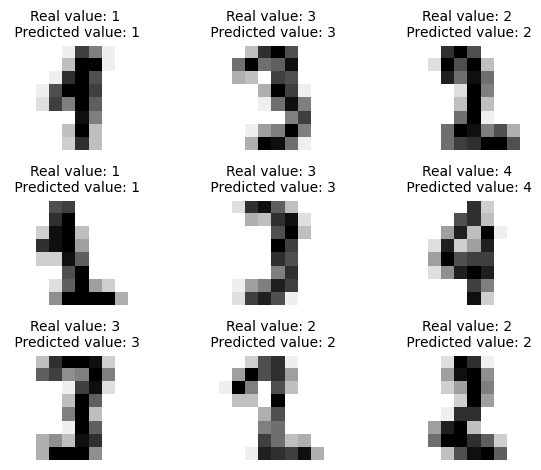

In [147]:
figs, axes = plt.subplots(3, 3)
for i in range(9):
  axes[i//3, i%3].imshow(X_test[i].reshape((8, 8)), cmap=plt.cm.binary)
  axes[i//3, i%3].axis("off")
  axes[i//3, i%3].set_title("Real value: " + str(y_test[i])+ "\n" + " Predicted value: " + str(probs[i]), fontsize=10)
plt.tight_layout()
plt.show()